In [165]:
# standard libraries 
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from tueplots import axes, bundles , figsizes, fonts,fontsizes
import seaborn as sns
import random 
from random import randrange

In [166]:
# statistics 
import statsmodels.api as sm
from scipy import stats as stat
from sklearn.inspection import partial_dependence
from sklearn.utils import resample
from scipy.stats import sem
from statsmodels.graphics.regressionplots import plot_partregress

In [167]:
# ML models
from sklearn import tree  # Classification tree        
from xgboost import XGBClassifier # xgboost 
from sklearn.ensemble import RandomForestClassifier # Random forest 

In [180]:
# ML utilities 
from imblearn.combine import SMOTEENN # data augmentation 
from sklearn.utils import shuffle
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import metrics

# read in data 

In [169]:
nsw = pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/NswLalonde_transformed.csv') # RCT
nswre74 = pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/NswDeWab_transformed.csv') # RCT 
nswCps_lalonde =  pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswCps_lalonde.csv') # Quasi data 
nswPsid_lalonde = pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswPsid_lalonde.csv') # Quasi data 
nswCps_dehWab =   pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswCps_dehWab.csv') # Quasi data 
nswPsid_dehWab =  pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswPsid_dehWab.csv') # Quasi data 

<p> scatter plot's </p>

/Users/mawuliagamah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mawuliagamah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


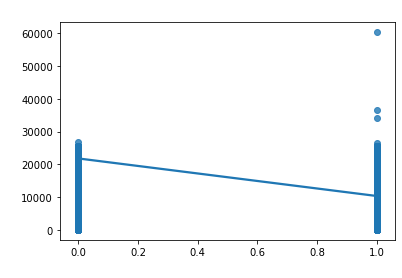

In [170]:
sns.regplot(nswCps_lalonde['black'], nswCps_lalonde['re78'], lowess=True)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title(' ')
plt.show()

<p> building block 1 </p>


plot = PartialDependenceDisplay.from_estimator(**pdp_params,response_method = "predict_proba")

pdp_params = {"estimator":boostestedTree,
               "features":plot_features,
                "X":features,
                "feature_names":plot_features }

target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)

features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)

hyper_parameter_ict = {"objective":"binary:logistic","seed":0,
                       "booster":"dart", "colsample_bytree":0.3,
                         "gamma":0.5, "learning_rate" : 0.05,
                           "max_depth":None, "min_child_weight":2,
                      "subsample":0.5, "nthread":4 }
plot_features = ['treat','age','education*','black','hispanic','married','nodegree','re75']


target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)

<p> building block 2  </p>

def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;


target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)


def fitandRunModelfunct(hyper_parameter_ict,features,target):

        model = XGBClassifier(**hyper_parameter_ict).fit(features,target)  # unpack dictionary 

        return model


model = fitandRunModelfunct(hyper_parameter_ict,features,target)

def partialdependenceplotfunct(model,features,feature_string, target_string):

        

        x_values = np.linspace(np.min(features[feature_string]), np.max(features[feature_string]))

        pdp_values = []
        for n in x_values:
            X_pdp = features.copy()
            X_pdp[feature_string] = n
            pdp_values.append(np.mean(model.predict(X_pdp)))

        plt.plot(x_values, pdp_values)
        plt.ylabel(target_string)
        plt.xlabel(feature_string)
        plt.title('Partial dependence plot for treated vs boosted tree')
        plt.show()

        return plot

feature_string = "education*"
target_string = "treat"
partialdependenceplotfunct(model,features,feature_string,target_string)       

boostestedTree = XGBClassifier(hyper_parameter_ict).fit(features,target)  # unpack dictionary 

def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;


target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)


boostestedTree = XGBClassifier(**hyper_parameter_ict).fit(features,target)  # unpack dictionary 

x_values = np.linspace(np.min(features['age']), np.max(features['age']))
pdp_values = []
for n in x_values:
  X_pdp = features.copy()
  X_pdp['age'] = n
  pdp_values.append(np.mean(boostestedTree.predict(X_pdp)))

plt.plot(x_values, pdp_values)
plt.ylabel('treated')
plt.xlabel('age')
plt.title('Partial dependence plot for treated vs boosted tree')
plt.show()

pdp_values

# WIP BOOTSTRAPPED partial dependence plot

n_bootstrap = 100

nox_values = np.linspace(np.min(X['NOX']), np.max(X['NOX']))

expected_value_bootstrap_replications = []

for _ in range(n_bootstrap):
    X_boot, y_boot = resample(X, y)
    rf_model_boot = RandomForestRegressor(n_estimators=100).fit(X_boot, y_boot)
    
    bootstrap_model_predictions = []
    for n in nox_values:
        X_pdp = X_boot.copy()
        X_pdp['NOX'] = n
        bootstrap_model_predictions.append(np.mean(rf_model.predict(X_pdp)))
    expected_value_bootstrap_replications.append(bootstrap_model_predictions)
    
expected_value_bootstrap_replications = np.array(expected_value_bootstrap_replications)
for ev in expected_value_bootstrap_replications:
    plt.plot(nox_values, ev, color='blue', alpha=.1)

prediction_se = np.std(expected_value_bootstrap_replications, axis=0)

plt.plot(nox_values, pdp_values, label='Model predictions')
plt.fill_between(nox_values, pdp_values - 3*prediction_se, pdp_values + 3*prediction_se, alpha=.5, label='Bootstrap CI')
plt.legend()
plt.ylabel('Median house price')
plt.xlabel('NOX')
plt.title('Partial dependence plot for NOX vs Price for Random Forest')
plt.show()

plot.figure_.suptitle(
    "Partial dependence plt"
)
plot.figure_.subplots_adjust(hspace=0.3)


plt.rcParams.update({"figure.dpi": 300}) 
plt.rcParams.update(bundles.neurips2022())
plt.rcParams.update(fonts.neurips2022())
plt.rcParams.update(axes.tick_direction( y="in"))
plt.rcParams.update(axes.color(base="black"))
plt.rcParams.update(figsizes.neurips2022(nrows=1, ncols=1))
plt.rcParams.update({'font.size': 18})

In [ ]:

hyper_parameter_ict = {"objective":"binary:logistic","seed":0,
                       "booster":"dart", "colsample_bytree":0.3,
                         "gamma":0.5, "learning_rate" : 0.05,
                           "max_depth":None, "min_child_weight":2,
                      "subsample":0.5, "nthread":4 }


# models 

# Function called fit model 
# def fitandRunModelfunct():
#  probabilities = model.predict_proba(dataset.drop('treat', axis=1))

# plotting function
#from sklearn import tree
#import graphviz
#tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
#graphviz.Source(tree_graph)

    #@classmethod
    #def variables_to_plot(self,features_string,target_string):
        #dataset = shuffle(self.dataset).reset_index(drop=True) # shuffle data 
    #    self.features_str = features_string
    #    self.target_str = target_string
    #    return self.features_str,self.target_str


def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;

target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = features_and_targets_function(target_variable,covariateSelection1,nswCps_lalonde)

In [ ]:
# Load classifiers 

In [218]:
class explainer(object):
    """
    explainer class takes in a model, dataset, list of covariates, list of targets and feature and target to plot 
    """
    # Class attribute
    def __init__(self,model,dataset,covariates,target,xy_list): # initialise class 
                  #bootstrap true false           
        super(explainer, self).__init__() 
        self.model = model
        self.dataset = shuffle(dataset).reset_index(drop=True) # shuffle data
        self.features = dataset[covariates]
        self.target = dataset[target]
        self.features_str = xy_list[0]
        self.target_str = xy_list[1]
        
    """
    create partial dependence plot
    """    
    
    def partial_dep_plot(self,ax):
        """
        parameters

        """
        

        x_values = np.linspace(np.min(self.features[self.features_str]), np.max(self.features[self.features_str])) # x-range for the feature
        pdp_values = []
        for n in x_values:
            X_pdp = self.features.copy()
            X_pdp[self.features_str] = n
            pdp_values.append(np.mean(self.model.predict(X_pdp)))  
        ax = ax
        ax.plot(x_values, pdp_values)
        ax.set_ylabel(self.target_str)
        ax.set_xlabel(self.features_str)
        ax.set_title('Partial dependence plot for treated vs boosted tree')
        return ax
    
    # def plotTree(ax)



In [140]:
def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;


<p> KEY </p>
<p> 1 - nsw treated + CPS control  (Lalonde's original sample) </p>
<p> 2 - nsw treated + PSID control (Lalonde's original sample) </p>
<p> 3 - nsw treated + CPS control  (Dehejia & Wahba sub-sample) </p>
<p> 4 - nsw treated + PSID control (Dehejia & Wahba sub-sample) </p>

# Fit all tree based models 

In [179]:
# Features and Tarfets 
target_variable = "treat" # target 
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75'] # features 

nswCps_lalonde[covariateSelection1]

,treat,age,education*,black,hispanic,married,nodegree,re75
0,1.0,37,11,1.0,0.0,1.0,1.0,0
1,1.0,22,9,0.0,1.0,0.0,1.0,0
2,1.0,30,12,1.0,0.0,0.0,0.0,0
3,1.0,27,11,1.0,0.0,0.0,1.0,0
4,1.0,33,8,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
16284,0.0,22,12,1.0,0.0,0.0,0.0,6801
16285,0.0,20,12,1.0,0.0,1.0,0.0,11832
16286,0.0,37,12,0.0,0.0,0.0,0.0,1559
16287,0.0,47,9,0.0,0.0,1.0,1.0,11384


In [224]:
# Features and Tarfets 
target_variable = "treat" # target 
#covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75'] # features 
covariateSelection2 = ['age','education*','black','hispanic','married','nodegree','re75'] # features 
# features and target function to split dataset up ( this could go into the explainer class)
features,target = features_and_targets_function(target_variable,covariateSelection1,nswCps_lalonde) 

# Hyper parameters ( taken from grid search)

# CART
cart_hyper_params1 = {"random_state":0,"criterion":'entropy',
                        "max_depth":5,"max_leaf_nodes":12,
                      "min_samples_leaf":2}     

#Random forest
forest_hyper_params1 = {"random_state":0,"criterion":'entropy',
                            "max_depth":8,"max_features":'sqrt',"min_samples_split" :2,
                          "n_estimators":100}     

# xgboost 
boost_hyper_params1 = {"objective":"binary:logistic","seed":0,
                       "booster":"dart", "colsample_bytree":0.3,
                         "gamma":0.5, "learning_rate" : 0.05,
                           "max_depth":None, "min_child_weight":2,
                        "subsample":0.5, "nthread":4 }                



# Fit model, resampling true or false 
# This will probably end up being a class 
# KFold cross validation 
def evaluate(model,hyper_params,features_target,dataset,data_augmentation):
	# prepare the cross-validation procedure
	skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
	
	#Function to get model scores	
	def get_score(model,X_train , X_test, y_train , y_test,fold,store):
		model.fit(X_train,y_train) # Fit model 
		prediction = model.predict(X_test) # Make prediction 
		predicted_proba = model.predict_proba(X_test) # Probability prediction         
		prediction_proba_df = pd.DataFrame(predicted_proba)
		pos_predicted_proba = prediction_proba_df[1] # Take positive probability predictions for ROC_AUC score  
		store.loc['Accuracy:', fold] = metrics.balanced_accuracy_score(y_test, prediction)
		store.loc['Precision:', fold] = metrics.precision_score(y_test, prediction)
		store.loc['Recall:', fold] = metrics.recall_score(y_test, prediction)
		store.loc['MSE:', fold] =  metrics.mean_squared_error(y_test, prediction)
		store.loc['MAE:', fold] =  metrics.mean_absolute_error(y_test, prediction)
		store.loc['R^2:', fold] =  metrics.r2_score(y_test, prediction)
		store.loc['auc:', fold] =  metrics.roc_auc_score(y_test, prediction)
		store.loc['roc_auc:', fold] =  metrics.roc_auc_score(y_test, pos_predicted_proba)
		store.loc['F1:', fold] =  metrics.f1_score(y_test, prediction)
		store.loc['log-loss:', fold] = metrics.log_loss(y_test, predicted_proba)
	

	resample=SMOTEENN(random_state=0)
	#Kfold training loop
	for fold, (train_index , test_index) in enumerate(skf.split(features,target)):
		#print("TRAIN:", train_index, "TEST:", test_index)
		X_train , X_test, y_train , y_test = features.iloc[train_index,:],features.iloc[test_index,:],\
			                                 target[train_index] , target[test_index]
											 
		X_train, y_train = resample.fit_resample(X_train, y_train)	
		shuffled = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)],axis=1).sample(frac=1,random_state=42).reset_index(drop=True)
		#resplit into test and train 
		X_train, y_train = shuffled.iloc[:,:-1], shuffled.iloc[:,-1]
		get_score(input_model,X_train , X_test, y_train , y_test,fold,store)
		# return statement here with python dataframe of metrics 

In [225]:
def fit_data(model,hyper_params,features_target,dataset,data_augmentation):

    """ Fits a chose model to given dataset , dataset will be shuffled
    Parameters
    ----------
    model : 
    hyper_params : 
    features_target :
    data_augmentation :
    dataset :   
    """

    def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets
        Parameters
        ---------- 
        features : 
        target : 
        """

        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;

    features,target = features_and_targets_function(features_target['target'],features_target['features'],nswCps_lalonde) 

    if data_augmentation == "none":
        model = model(**hyper_params)
        fitted_model = model.fit(features,target)

    elif data_augmentation == "smoteEnn":
        resample=SMOTEENN(random_state=0)
        print("smote here , do we use smote when fitting to the whole dataset?")
    else:
        pass
    
    return fitted_model
    

In [226]:
covariateSelection2

['age', 'education*', 'black', 'hispanic', 'married', 'nodegree', 're75']

In [227]:
features_target_dictionary = {"target":"treat","features":covariateSelection2}  

In [237]:
tree1 = fit_data(tree.DecisionTreeClassifier,cart_hyper_params1,features_target_dictionary,nsw,"none")
forest1 = fit_data(RandomForestClassifier,cart_hyper_params1,features_target_dictionary,nsw,"none")
boost1 = fit_data(XGBClassifier,cart_hyper_params1,features_target_dictionary,nsw,"none")

[20:13:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "criterion", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




#### analysis

In [238]:
# Boosted tree
pdp = explainer(boost1,nsw,covariateSelection2,target_variable,["re75","treat"])
pdp2 = explainer(boost1,nsw,covariateSelection2,target_variable,["education*","treat"])
pdp3 = explainer(boost1,nsw,covariateSelection2,target_variable,["black","treat"])
pdp4 = explainer(boost1,nsw,covariateSelection2,target_variable,["hispanic","treat"])
pdp5 = explainer(boost1,nsw,covariateSelection2,target_variable,["age","treat"])
pdp6 = explainer(boost1,nsw,covariateSelection2,target_variable,["married","treat"])

In [239]:
# Random Forest
pdp = explainer(boost1,nsw,covariateSelection2,target_variable,["re75","treat"])
pdp2 = explainer(boost1,nsw,covariateSelection2,target_variable,["education*","treat"])
pdp3 = explainer(boost1,nsw,covariateSelection2,target_variable,["black","treat"])
pdp4 = explainer(boost1,nsw,covariateSelection2,target_variable,["hispanic","treat"])
pdp5 = explainer(boost1,nsw,covariateSelection2,target_variable,["age","treat"])
pdp6 = explainer(boost1,nsw,covariateSelection2,target_variable,["married","treat"])

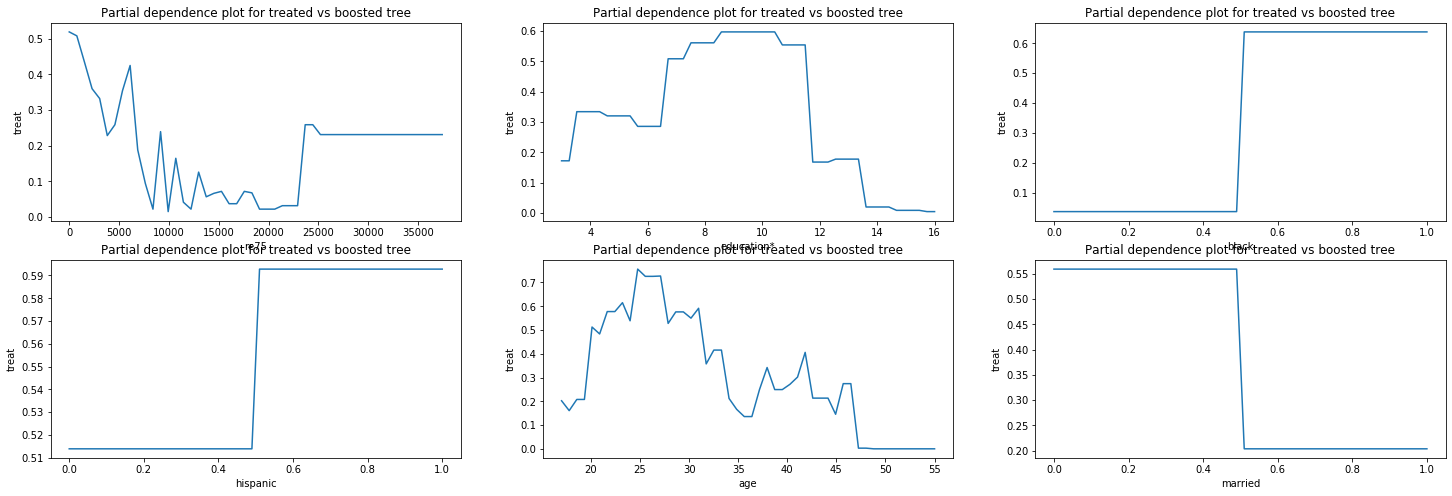

In [240]:

# NSW trial plots 
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(25,8))

# Boosted Tree
plot1 = pdp.partial_dep_plot(ax[0,0])
plot2 = pdp2.partial_dep_plot(ax[0,1])
plot3 = pdp3.partial_dep_plot(ax[0,2])
plot4 = pdp4.partial_dep_plot(ax[1,0])
plot5 = pdp5.partial_dep_plot(ax[1,1])
plot6 = pdp6.partial_dep_plot(ax[1,2])

plt.show()


# Decision tree explainer

<p> read the tree's </p>
<p> Leaves with children show their splitting criterion on the top  </p>
<p> The pair of values at the bottom show the count of False values and True values for the target respectively, of data points in that node of the tree.</p>

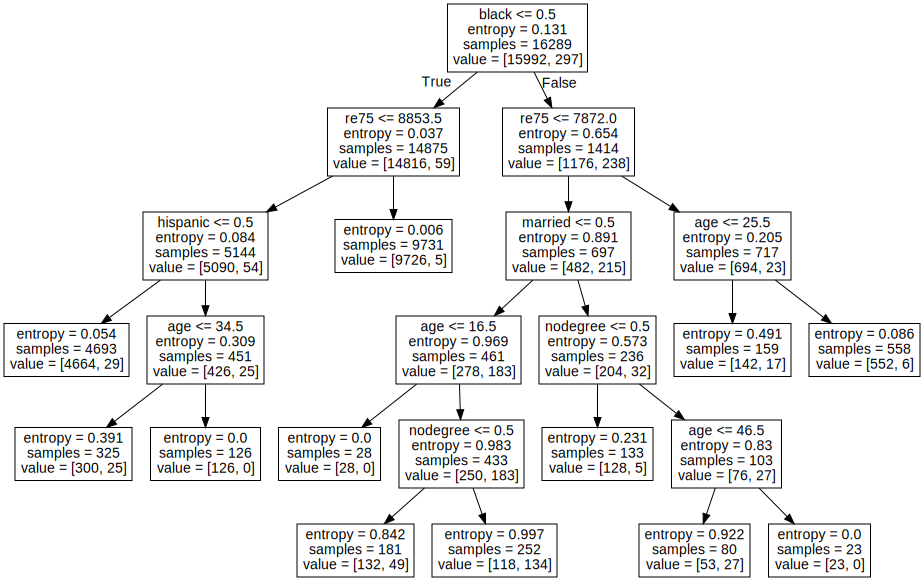

In [241]:
from sklearn import tree
import graphviz
tree_graph = tree.export_graphviz(tree1, out_file=None, feature_names=covariateSelection2)
graphviz.Source(tree_graph)

In [ ]:
#pdp.cart_graph(ax[0,0])
tree_graph.